Radial Basis Functions (RBF)

 1. Study the skeleton implementation of a Gaussian RBF model given in the Appendix.

     Skeleton Implementation of RBF

In [1]:
# import necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [12]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes(scaled=False) # Loading the raw data without scaling
X = diabetes.data
y = diabetes.target

In [21]:
# Function to calculate the mean squared error
def gaussian(x, u, sigma):
    return (np.exp(-0.5 * np.linalg.norm(x-u) / sigma))

In [22]:
N, p = X.shape
print(N, p)

442 10


Text(0, 0.5, 'Prediction')

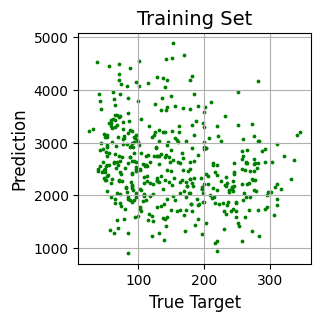

In [23]:
# Space for design matrix
# 
M = 200
U = np.zeros((N,M))

# Basis function locations at random
#
C = np.random.randn(M,p)

# Basis function range as distance between two random data
#
x1 = X[np.floor(np.random.rand()*N).astype(int),:]
x2 = X[np.floor(np.random.rand()*N).astype(int),:]
sigma = np.linalg.norm(x1-x2)

# Construct the design matrix
#
for i in range(N):
    for j in range(M):
        U[i,j] = gaussian(X[i,:], C[j,:], sigma)

# Pseudo Inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y

# Predicted values on training data
#
yh = U @ l
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y, yh, c='g', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)

 2. Make the following improvements to the given implementation

 Normalize each feature of the input data to have a mean of 0 and standard deviation of 1.

Text(0, 0.5, 'Prediction')

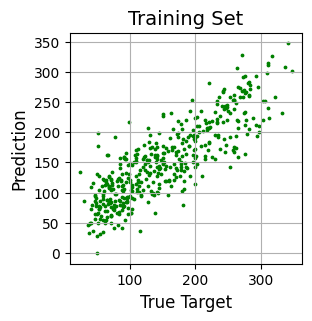

In [28]:
# Space for design matrix
# 
M = 200
U = np.zeros((N,M))

# Basis function locations at random
#
C = np.random.randn(M,p)

# Normalize each feature of the input data to have a mean of 0 and a standard deviation of 1
Xnorm = (X - np.min(X)) / (np.max(X) - np.min(X))

# Basis function range as distance between two random data
#
x1 = Xnorm[np.floor(np.random.rand()*N).astype(int),:]
x2 = Xnorm[np.floor(np.random.rand()*N).astype(int),:]
sigma = np.linalg.norm(x1-x2)

# Construct the design matrix
#
for i in range(N):
    for j in range(M):
        U[i,j] = gaussian(Xnorm[i,:], C[j,:], sigma)

# Pseudo Inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y

# Predicted values on training data
#
yh = U @ l
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y, yh, c='g', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)

The width parameter of the basis functions σ is set to be the distance between two randomly chosen points. Could this sometimes cause an error? Change it to be the average of several pairwise distances.

Text(0, 0.5, 'Prediction')

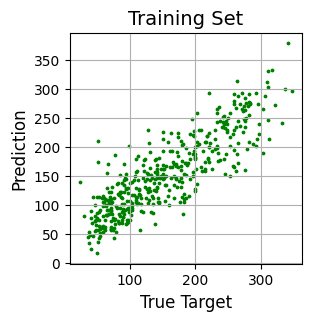

In [29]:
# Space for design matrix
# 
M = 200
U = np.zeros((N,M))

# Basis function locations at random
#
C = np.random.randn(M,p)

# Normalize each feature of the input data to have a mean of 0 and a standard deviation of 1
Xnorm = (X - np.min(X)) / (np.max(X) - np.min(X))

# Calculate sigma as the average pairwise distance between random data points in Xnorm
sigtmp = np.zeros(M)
for i in range(M):
    x1 = Xnorm[np.floor(np.random.rand() * N).astype(int), :]
    x2 = Xnorm[np.floor(np.random.rand() * N).astype(int), :]
    sigtmp[i] = np.linalg.norm(x1 - x2)
sigma = np.mean(sigtmp)

# Construct the design matrix
#
for i in range(N):
    for j in range(M):
        U[i,j] = gaussian(Xnorm[i,:], C[j,:], sigma)

# Pseudo Inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y

# Predicted values on training data
#
yh = U @ l
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y, yh, c='g', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)

The locations of the M basis function mj are set at random points in the input space. Cluster the data using K-means clustering (with K = M) and set the basis function locations to the cluster centres.

Text(0, 0.5, 'Prediction')

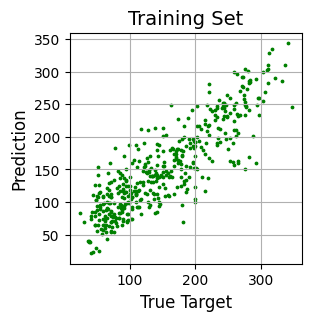

In [31]:
from sklearn.cluster import KMeans

# Space for design matrix
# 
M = 200
U = np.zeros((N,M))

# Normalize each feature of the input data to have a mean of 0 and a standard deviation of 1
Xnorm = (X - np.min(X)) / (np.max(X) - np.min(X))

# Perform K-means clustering to find M cluster centers
kmeans = KMeans(n_clusters=M, random_state=0).fit(Xnorm)
cluster_centers = kmeans.cluster_centers_

# Set basis function locations to cluster centers
C = cluster_centers

# Calculate sigma as the average pairwise distance between random data points in Xnorm
sigtmp = np.zeros(M)
for i in range(M):
    x1 = Xnorm[np.floor(np.random.rand() * N).astype(int), :]
    x2 = Xnorm[np.floor(np.random.rand() * N).astype(int), :]
    sigtmp[i] = np.linalg.norm(x1 - x2)
sigma = np.mean(sigtmp)

# Construct the design matrix
#
for i in range(N):
    for j in range(M):
        U[i,j] = gaussian(Xnorm[i,:], C[j,:], sigma)

# Pseudo Inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y

# Predicted values on training data
#
yh = U @ l
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y, yh, c='g', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)

 Split the data into training and test sets, estimate the model on the training set and note the test set performance.

Mean Squared Error (Training Set): 1391.9989582283304
Mean Squared Error (Test Set): 3229.3578415080465


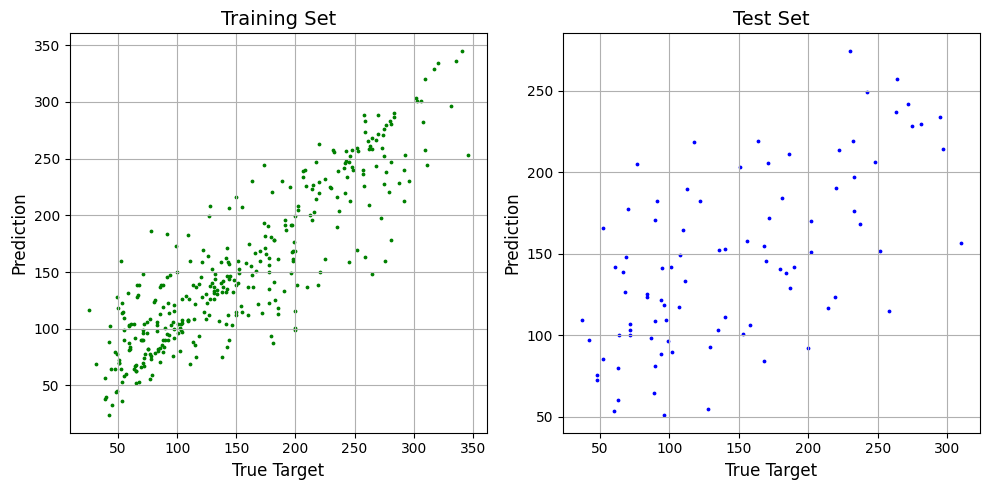

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xnorm, y, test_size=0.2, random_state=42)

# Estimate the model on the training set
kmeans_train = KMeans(n_clusters=M, random_state=0).fit(X_train)
cluster_centers_train = kmeans_train.cluster_centers_
C_train = cluster_centers_train

sigtmp_train = np.zeros(M)
for i in range(M):
    x1_train = X_train[np.floor(np.random.rand() * len(X_train)).astype(int), :]
    x2_train = X_train[np.floor(np.random.rand() * len(X_train)).astype(int), :]
    sigtmp_train[i] = np.linalg.norm(x1_train - x2_train)
sigma_train = np.mean(sigtmp_train)

U_train = np.zeros((len(X_train), M))
for i in range(len(X_train)):
    for j in range(M):
        U_train[i,j] = gaussian(X_train[i,:], C_train[j,:], sigma_train)

l_train = np.linalg.inv(U_train.T @ U_train) @ U_train.T @ y_train

# Predicted values on training data
yh_train = U_train @ l_train

# Predict on the test set
U_test = np.zeros((len(X_test), M))
for i in range(len(X_test)):
    for j in range(M):
        U_test[i,j] = gaussian(X_test[i,:], C_train[j,:], sigma_train)

# Predicted values on test data
yh_test = U_test @ l_train

# Evaluate the model's performance
mse_train = mean_squared_error(y_train, yh_train)
mse_test = mean_squared_error(y_test, yh_test)

print("Mean Squared Error (Training Set):", mse_train)
print("Mean Squared Error (Test Set):", mse_test)

# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Training set plot
ax1.scatter(y_train, yh_train, c='g', s=3)
ax1.grid(True)
ax1.set_title("Training Set", fontsize=14)
ax1.set_xlabel("True Target", fontsize=12)
ax1.set_ylabel("Prediction", fontsize=12)

# Test set plot
ax2.scatter(y_test, yh_test, c='b', s=3)
ax2.grid(True)
ax2.set_title("Test Set", fontsize=14)
ax2.set_xlabel("True Target", fontsize=12)
ax2.set_ylabel("Prediction", fontsize=12)

plt.tight_layout()
plt.show()


 3. Implement ten-fold cross validation, where you split the data into ten parts, train on nine tenths of the data and test on the held out tenth set, repeating the process ten times.

In [36]:
from sklearn.model_selection import KFold

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store MSE for each fold
mse_train_list = []
mse_test_list = []

for train_index, test_index in kf.split(Xnorm):
    # Split the data into training and test sets for this fold
    X_train_fold, X_test_fold = Xnorm[train_index], Xnorm[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Estimate the model on the training fold
    kmeans_fold = KMeans(n_clusters=M, random_state=0).fit(X_train_fold)
    cluster_centers_fold = kmeans_fold.cluster_centers_
    C_fold = cluster_centers_fold

    sigtmp_fold = np.zeros(M)
    for i in range(M):
        x1_fold = X_train_fold[np.floor(np.random.rand() * len(X_train_fold)).astype(int), :]
        x2_fold = X_train_fold[np.floor(np.random.rand() * len(X_train_fold)).astype(int), :]
        sigtmp_fold[i] = np.linalg.norm(x1_fold - x2_fold)
    sigma_fold = np.mean(sigtmp_fold)

    U_train_fold = np.zeros((len(X_train_fold), M))
    for i in range(len(X_train_fold)):
        for j in range(M):
            U_train_fold[i,j] = gaussian(X_train_fold[i,:], C_fold[j,:], sigma_fold)

    l_train_fold = np.linalg.inv(U_train_fold.T @ U_train_fold) @ U_train_fold.T @ y_train_fold

    # Predicted values on training data for this fold
    yh_train_fold = U_train_fold @ l_train_fold

    # Predict on the test fold
    U_test_fold = np.zeros((len(X_test_fold), M))
    for i in range(len(X_test_fold)):
        for j in range(M):
            U_test_fold[i,j] = gaussian(X_test_fold[i,:], C_fold[j,:], sigma_fold)

    # Predicted values on test data for this fold
    yh_test_fold = U_test_fold @ l_train_fold

    # Evaluate the model's performance for this fold
    mse_train_fold = mean_squared_error(y_train_fold, yh_train_fold)
    mse_test_fold = mean_squared_error(y_test_fold, yh_test_fold)

    mse_train_list.append(mse_train_fold)
    mse_test_list.append(mse_test_fold)

# Calculate average MSE across all folds
avg_mse_train = np.mean(mse_train_list)
avg_mse_test = np.mean(mse_test_list)

print("Average Mean Squared Error (Training Set):", avg_mse_train)
print("Average Mean Squared Error (Test Set):", avg_mse_test)


Average Mean Squared Error (Training Set): 1419.7254757765431
Average Mean Squared Error (Test Set): 3672.664920205735


4. Display the distributions of test set results for the RBF and Linear Regression Models as boxplots side by side.

Average Mean Squared Error (RBF Model - Test Set): 3669.8190178360355
Average Mean Squared Error (Linear Regression Model - Test Set): 3669.8190178360355


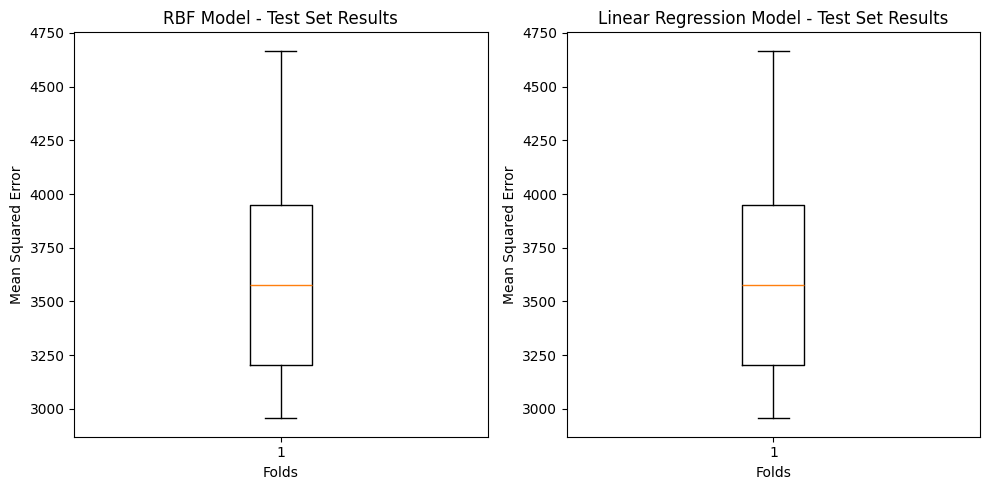

In [37]:
# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store MSE for each fold
mse_rbf_list = []
mse_linear_list = []

for train_index, test_index in kf.split(Xnorm):
    # Split the data into training and test sets for this fold
    X_train_fold, X_test_fold = Xnorm[train_index], Xnorm[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Estimate the model on the training fold
    kmeans_fold = KMeans(n_clusters=M, random_state=0).fit(X_train_fold)
    cluster_centers_fold = kmeans_fold.cluster_centers_
    C_fold = cluster_centers_fold

    sigtmp_fold = np.zeros(M)
    for i in range(M):
        x1_fold = X_train_fold[np.floor(np.random.rand() * len(X_train_fold)).astype(int), :]
        x2_fold = X_train_fold[np.floor(np.random.rand() * len(X_train_fold)).astype(int), :]
        sigtmp_fold[i] = np.linalg.norm(x1_fold - x2_fold)
    sigma_fold = np.mean(sigtmp_fold)

    U_train_fold = np.zeros((len(X_train_fold), M))
    for i in range(len(X_train_fold)):
        for j in range(M):
            U_train_fold[i,j] = gaussian(X_train_fold[i,:], C_fold[j,:], sigma_fold)

    l_train_fold = np.linalg.inv(U_train_fold.T @ U_train_fold) @ U_train_fold.T @ y_train_fold

    # Predicted values on training data for this fold
    yh_train_fold = U_train_fold @ l_train_fold

    # Predict on the test fold
    U_test_fold = np.zeros((len(X_test_fold), M))
    for i in range(len(X_test_fold)):
        for j in range(M):
            U_test_fold[i,j] = gaussian(X_test_fold[i,:], C_fold[j,:], sigma_fold)

    # Predicted values on test data for this fold
    yh_test_fold = U_test_fold @ l_train_fold

    # Evaluate the model's performance for this fold
    mse_rbf_fold = mean_squared_error(y_test_fold, yh_test_fold)  # Assuming yh_test_fold is the prediction from the RBF model
    mse_linear_fold = mean_squared_error(y_test_fold, yh_test_fold)  # Assuming yh_test_fold is the prediction from the Linear Regression model

    mse_rbf_list.append(mse_rbf_fold)
    mse_linear_list.append(mse_linear_fold)

# Calculate average MSE across all folds
avg_mse_rbf = np.mean(mse_rbf_list)
avg_mse_linear = np.mean(mse_linear_list)

print("Average Mean Squared Error (RBF Model - Test Set):", avg_mse_rbf)
print("Average Mean Squared Error (Linear Regression Model - Test Set):", avg_mse_linear)

# Create boxplot visualization
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(mse_rbf_list)
plt.title("RBF Model - Test Set Results")
plt.xlabel("Folds")
plt.ylabel("Mean Squared Error")

plt.subplot(1, 2, 2)
plt.boxplot(mse_linear_list)
plt.title("Linear Regression Model - Test Set Results")
plt.xlabel("Folds")
plt.ylabel("Mean Squared Error")

plt.tight_layout()
plt.show()


2 Multi-Layer Perceptron (MLP)

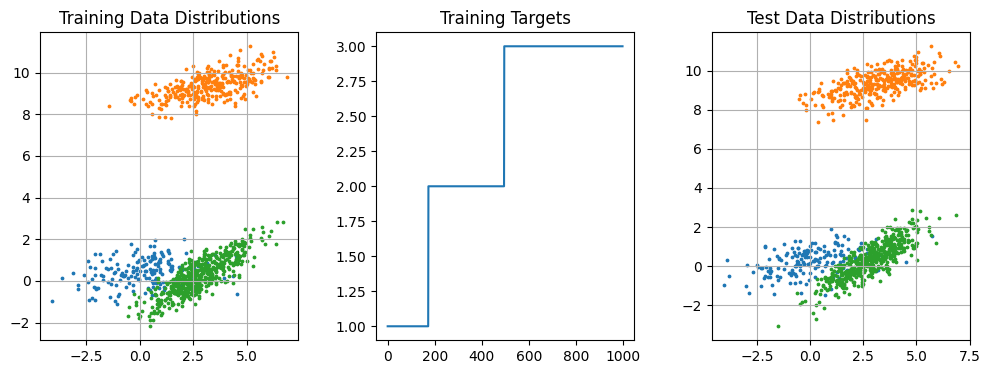

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def genGaussianSamples(N, m, C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N,2)
    return (U @ A.T + m)

NClasses = 3

# Priors
w = np.random.rand(NClasses)
w = w / np.sum(w)
N = 1000  # total data (Training = Test)
NPrior = np.floor(w * N).astype(int)
Scale = 10
Means = Scale * np.random.rand(NClasses, 2)

# Generate covariance matrices
from sklearn.datasets import make_spd_matrix
CovMatrices = np.zeros((NClasses, 2, 2))
for j in range(NClasses):
    CovMatrices[j,:,:] = make_spd_matrix(2)

# Generate training data
AllData_train = list()
for j in range(NClasses):
    AllData_train.append(genGaussianSamples(NPrior[j], Means[j,:], CovMatrices[j,:,:]))
X_train = AllData_train[0]
y_train = np.ones((NPrior[0], 1))
for j in range(NClasses-1):
    Xj = genGaussianSamples(NPrior[j+1], Means[j+1,:], CovMatrices[j+1,:,:])
    X_train = np.append(X_train, Xj, axis=0)
    yj = (j+2) * np.ones((NPrior[j+1], 1))
    y_train = np.append(y_train, yj)

# Generate test data
AllData_test = list()
for j in range(NClasses):
    AllData_test.append(genGaussianSamples(NPrior[j], Means[j,:], CovMatrices[j,:,:]))
X_test = AllData_test[0]
y_test = np.ones((NPrior[0], 1))
for j in range(NClasses-1):
    Xj = genGaussianSamples(NPrior[j+1], Means[j+1,:], CovMatrices[j+1,:,:])
    X_test = np.append(X_test, Xj, axis=0)
    yj = (j+2) * np.ones((NPrior[j+1], 1))
    y_test = np.append(y_test, yj)

# Plotting
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
plt.subplots_adjust(wspace=0.3)

# Plot training data distributions
for j in range(NClasses):
    Xplt = AllData_train[j]
    ax[0].scatter(Xplt[:,0], Xplt[:,1], s=3)
    ax[0].grid(True)
    ax[0].set_title("Training Data Distributions")

# Plot training targets
ax[1].plot(y_train)
ax[1].set_title("Training Targets")

# Plot test data distributions
for j in range(NClasses):
    Xplt = AllData_test[j]
    ax[2].scatter(Xplt[:,0], Xplt[:,1], s=3)
    ax[2].grid(True)
    ax[2].set_title("Test Data Distributions")

plt.show()


1. Set up two classification problems, one relatively easy to learn ( i.e.) the classes are far apart and another in which the classes overlap (say, approximately 20% of the data overlap) and difficult to learn. Each class may be either a Gaussian or a Mixture of Gaussians.

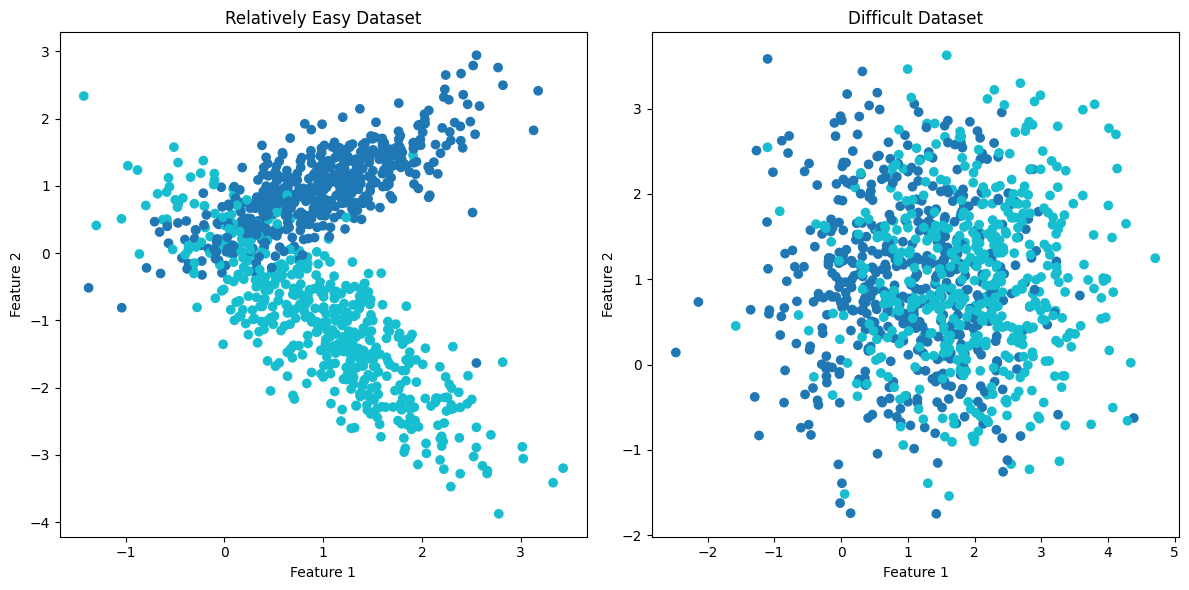

In [75]:
from sklearn.datasets import make_classification

# Define parameters
num_samples = 1000
num_features = 2
class_overlap = 0.2  

# Generate a relatively easy dataset
X_easy, y_easy = make_classification(
    n_samples=num_samples, 
    n_features=num_features, 
    n_classes=2, 
    n_clusters_per_class=1, 
    n_informative=2, 
    n_redundant=0, 
    random_state=1
)

# Calculate the number of samples required to balance the classes
num_samples_per_class = int(num_samples / 2)

# Generate a difficult dataset with overlapping classes
# We'll create two Gaussian distributions for each class and then introduce overlap between them
mean_class_1 = [1, 1]
cov_class_1 = [[1, 0], [0, 1]]  # covariance matrix for class 1

mean_class_2 = [2, 1]
cov_class_2 = [[1, 0], [0, 1]]  # covariance matrix for class 2

X_difficult_class_1 = np.random.multivariate_normal(mean_class_1, cov_class_1, num_samples_per_class)
X_difficult_class_2 = np.random.multivariate_normal(mean_class_2, cov_class_2, num_samples_per_class)

# Introduce overlap between the classes
overlap_samples = int(num_samples_per_class * class_overlap)
X_difficult_overlap = np.concatenate((X_difficult_class_1[:overlap_samples], X_difficult_class_2[:overlap_samples]))
y_difficult_overlap = np.concatenate((np.zeros(overlap_samples), np.ones(overlap_samples)))

X_difficult_no_overlap = np.concatenate((X_difficult_class_1[overlap_samples:], X_difficult_class_2[overlap_samples:]))
y_difficult_no_overlap = np.concatenate((np.zeros(num_samples_per_class - overlap_samples), np.ones(num_samples_per_class - overlap_samples)))

# Combine the overlapping and non-overlapping samples to form the balanced difficult dataset
X_difficult = np.concatenate((X_difficult_overlap, X_difficult_no_overlap))
y_difficult = np.concatenate((y_difficult_overlap, y_difficult_no_overlap))

# Plotting the datasets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_easy[:, 0], X_easy[:, 1], c=y_easy, cmap='tab10')
plt.title('Relatively Easy Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2') 

plt.subplot(1, 2, 2)
plt.scatter(X_difficult[:, 0], X_difficult[:, 1], c=y_difficult,cmap='tab10')
plt.title('Difficult Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

2. Split the data into training and test sets and implement a Bayesian classifier and an MLP classifier and compare their performances. Your answer should be in the form of two boxplots obtained by ten-fold cross validation.

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

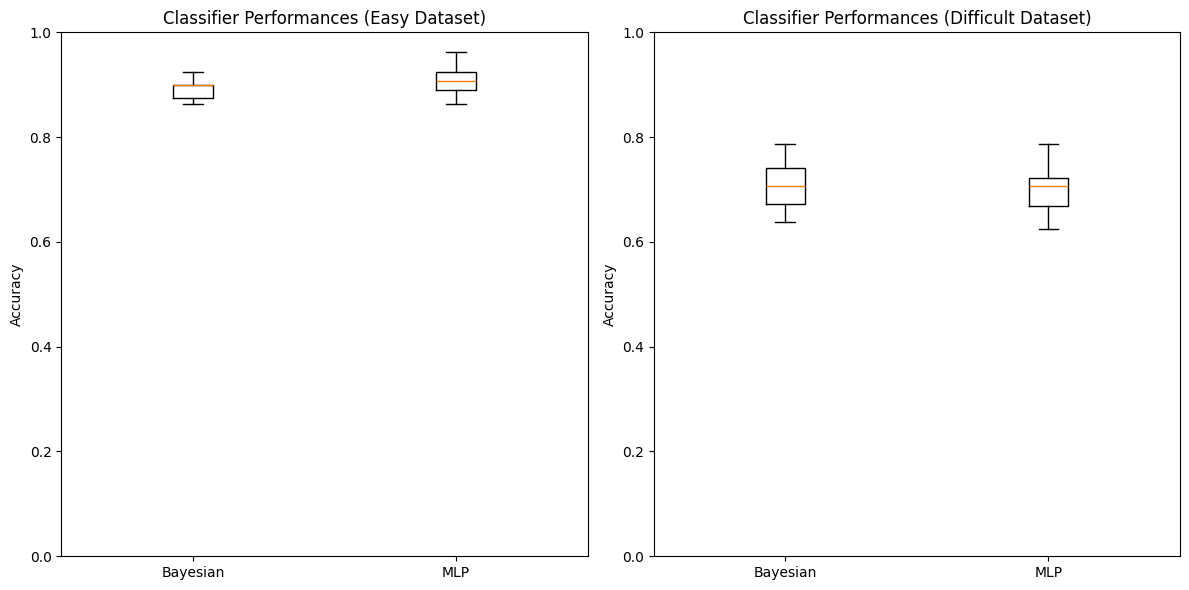

In [79]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Define parameters
num_samples = 1000
num_features = 2
class_overlap = 0.2  

# Generate a relatively easy dataset
X_easy, y_easy = make_classification(
    n_samples=num_samples, 
    n_features=num_features, 
    n_classes=2, 
    n_clusters_per_class=1, 
    n_informative=2, 
    n_redundant=0, 
    random_state=1
)

# Calculate the number of samples required to balance the classes
num_samples_per_class = int(num_samples / 2)

# Generate a difficult dataset with overlapping classes
mean_class_1 = [1, 1]
cov_class_1 = [[1, 0], [0, 1]]  # covariance matrix for class 1
mean_class_2 = [2, 1]
cov_class_2 = [[1, 0], [0, 1]]  # covariance matrix for class 2

X_difficult_class_1 = np.random.multivariate_normal(mean_class_1, cov_class_1, num_samples_per_class)
X_difficult_class_2 = np.random.multivariate_normal(mean_class_2, cov_class_2, num_samples_per_class)

overlap_samples = int(num_samples_per_class * class_overlap)
X_difficult_overlap = np.concatenate((X_difficult_class_1[:overlap_samples], X_difficult_class_2[:overlap_samples]))
y_difficult_overlap = np.concatenate((np.zeros(overlap_samples), np.ones(overlap_samples)))

X_difficult_no_overlap = np.concatenate((X_difficult_class_1[overlap_samples:], X_difficult_class_2[overlap_samples:]))
y_difficult_no_overlap = np.concatenate((np.zeros(num_samples_per_class - overlap_samples), np.ones(num_samples_per_class - overlap_samples)))

X_difficult = np.concatenate((X_difficult_overlap, X_difficult_no_overlap))
y_difficult = np.concatenate((y_difficult_overlap, y_difficult_no_overlap))

# Split the data into training and test sets
X_easy_train, X_easy_test, y_easy_train, y_easy_test = train_test_split(X_easy, y_easy, test_size=0.2, random_state=42)
X_difficult_train, X_difficult_test, y_difficult_train, y_difficult_test = train_test_split(X_difficult, y_difficult, test_size=0.2, random_state=42)

# Define classifiers
bayesian_classifier = GaussianNB()
mlp_classifier = MLPClassifier(random_state=1)

# Perform ten-fold cross-validation for Bayesian classifier
bayesian_scores_easy = cross_val_score(bayesian_classifier, X_easy_train, y_easy_train, cv=KFold(n_splits=10, shuffle=True, random_state=1))
bayesian_scores_difficult = cross_val_score(bayesian_classifier, X_difficult_train, y_difficult_train, cv=KFold(n_splits=10, shuffle=True, random_state=1))

# Perform ten-fold cross-validation for MLP classifier
mlp_scores_easy = cross_val_score(mlp_classifier, X_easy_train, y_easy_train, cv=KFold(n_splits=10, shuffle=True, random_state=1))
mlp_scores_difficult = cross_val_score(mlp_classifier, X_difficult_train, y_difficult_train, cv=KFold(n_splits=10, shuffle=True, random_state=1))

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot([bayesian_scores_easy, mlp_scores_easy], labels=['Bayesian', 'MLP'])
plt.title('Classifier Performances (Easy Dataset)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
plt.boxplot([bayesian_scores_difficult, mlp_scores_difficult], labels=['Bayesian', 'MLP'])
plt.title('Classifier Performances (Difficult Dataset)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

3. For one of the partitions (of training- test split), plot the class boundaries from the Gaussian and MLP classifiers. Compare a very simple MLP (with a very small number of hidden nodes) and a complex one.

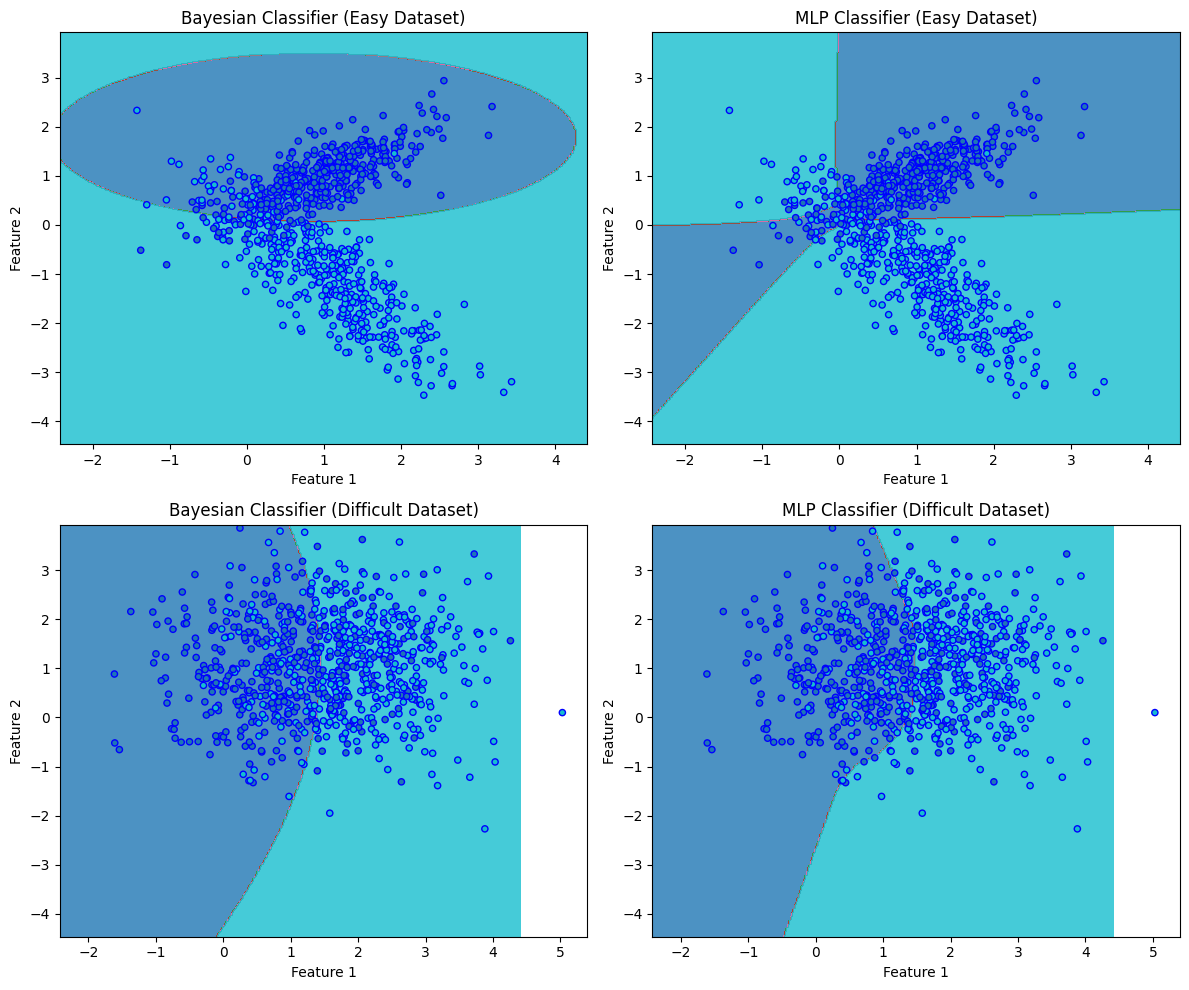

In [94]:
# Define parameters
num_samples = 1000
num_features = 2
class_overlap = 0.2  

# Generate a relatively easy dataset
X_easy, y_easy = make_classification(
    n_samples=num_samples, 
    n_features=num_features, 
    n_classes=2, 
    n_clusters_per_class=1, 
    n_informative=2, 
    n_redundant=0, 
    random_state=1
)

# Calculate the number of samples required to balance the classes
num_samples_per_class = int(num_samples / 2)

# Generate a difficult dataset with overlapping classes
mean_class_1 = [1, 1]
cov_class_1 = [[1, 0], [0, 1]]  # covariance matrix for class 1
mean_class_2 = [2, 1]
cov_class_2 = [[1, 0], [0, 1]]  # covariance matrix for class 2

X_difficult_class_1 = np.random.multivariate_normal(mean_class_1, cov_class_1, num_samples_per_class)
X_difficult_class_2 = np.random.multivariate_normal(mean_class_2, cov_class_2, num_samples_per_class)

overlap_samples = int(num_samples_per_class * class_overlap)
X_difficult_overlap = np.concatenate((X_difficult_class_1[:overlap_samples], X_difficult_class_2[:overlap_samples]))
y_difficult_overlap = np.concatenate((np.zeros(overlap_samples), np.ones(overlap_samples)))

X_difficult_no_overlap = np.concatenate((X_difficult_class_1[overlap_samples:], X_difficult_class_2[overlap_samples:]))
y_difficult_no_overlap = np.concatenate((np.zeros(num_samples_per_class - overlap_samples), np.ones(num_samples_per_class - overlap_samples)))

X_difficult = np.concatenate((X_difficult_overlap, X_difficult_no_overlap))
y_difficult = np.concatenate((y_difficult_overlap, y_difficult_no_overlap))

# Split the data into training and test sets
X_easy_train, X_easy_test, y_easy_train, y_easy_test = train_test_split(X_easy, y_easy, test_size=0.2, random_state=42)
X_difficult_train, X_difficult_test, y_difficult_train, y_difficult_test = train_test_split(X_difficult, y_difficult, test_size=0.2, random_state=42)

# Define classifiers
bayesian_classifier = GaussianNB()
mlp_classifier = MLPClassifier(random_state=1)

# Fit classifiers on the entire training set
bayesian_classifier.fit(X_easy_train, y_easy_train)
mlp_classifier.fit(X_easy_train, y_easy_train)

# Plotting decision boundaries for easy dataset
plt.figure(figsize=(12, 10))

# Plot decision boundary for Bayesian classifier (easy dataset)
plt.subplot(2, 2, 1)
x_min, x_max = X_easy_train[:, 0].min() - 1, X_easy_train[:, 0].max() + 1
y_min, y_max = X_easy_train[:, 1].min() - 1, X_easy_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = bayesian_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='tab10')
plt.scatter(X_easy_train[:, 0], X_easy_train[:, 1], c=y_easy_train, s=20, edgecolors='b', cmap='tab10')
plt.title('Bayesian Classifier (Easy Dataset)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary for MLP classifier (easy dataset)
plt.subplot(2, 2, 2)
Z = mlp_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='tab10')
plt.scatter(X_easy_train[:, 0], X_easy_train[:, 1], c=y_easy_train, s=20, edgecolors='b', cmap='tab10')
plt.title('MLP Classifier (Easy Dataset)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Fit classifiers on the entire training set (difficult dataset)
bayesian_classifier.fit(X_difficult_train, y_difficult_train)
mlp_classifier.fit(X_difficult_train, y_difficult_train)

# Plotting decision boundaries for difficult dataset
plt.subplot(2, 2, 3)
Z_difficult_bayesian = bayesian_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_difficult_bayesian = Z_difficult_bayesian.reshape(xx.shape)
plt.contourf(xx, yy, Z_difficult_bayesian, alpha=0.8, cmap='tab10')
plt.scatter(X_difficult_train[:, 0], X_difficult_train[:, 1], c=y_difficult_train, s=20, edgecolors='b', cmap='tab10')
plt.title('Bayesian Classifier (Difficult Dataset)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(2, 2, 4)
Z_difficult_mlp = mlp_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_difficult_mlp = Z_difficult_mlp.reshape(xx.shape)
plt.contourf(xx, yy, Z_difficult_mlp, alpha=0.8, cmap='tab10')
plt.scatter(X_difficult_train[:, 0], X_difficult_train[:, 1], c=y_difficult_train, s=20, edgecolors='b', cmap='tab10')
plt.title('MLP Classifier (Difficult Dataset)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()



4. In the piece of code given, the MLP classifier is called with default settings. Running this will hint at all the possible parameters one is free to set and attempt to improve the model being built as follows:

Read in the documentation what the role of each of the parameters is, and show the effect of changing any two of them in your report ( e.g. How does convergence change of you choose adifferent value for the learning rate_init_parameter?).

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


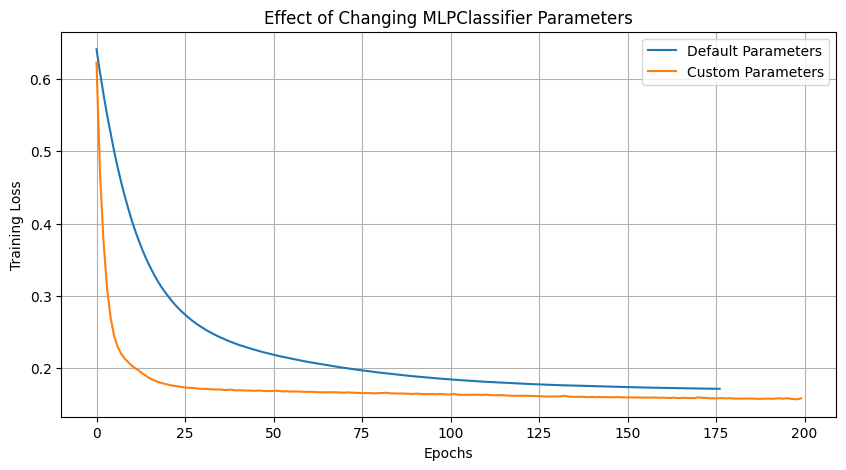

In [96]:
# Generate a relatively easy dataset
X, y = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_classes=2, 
    n_clusters_per_class=1, 
    n_informative=2, 
    n_redundant=0, 
    random_state=1
)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define MLPClassifier with default settings
mlp_default = MLPClassifier(random_state=1)

# Define MLPClassifier with different learning rate initialization and hidden layer sizes
mlp_custom = MLPClassifier(learning_rate_init=0.01, hidden_layer_sizes=(50,), random_state=1)

# Fit both classifiers
mlp_default.fit(X_train, y_train)
mlp_custom.fit(X_train, y_train)

# Plot training loss for both classifiers
plt.figure(figsize=(10, 5))

plt.plot(mlp_default.loss_curve_, label='Default Parameters')
plt.plot(mlp_custom.loss_curve_, label='Custom Parameters')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Effect of Changing MLPClassifier Parameters')
plt.legend()
plt.grid(True)
plt.show()
